✅ Semua library berhasil diimport
Memuat dataset...
✅ Dataset berhasil dimuat: 7043 baris, 21 kolom

EXPLORATORY DATA ANALYSIS (EDA)

1. 5 BARIS PERTAMA DATASET:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  .

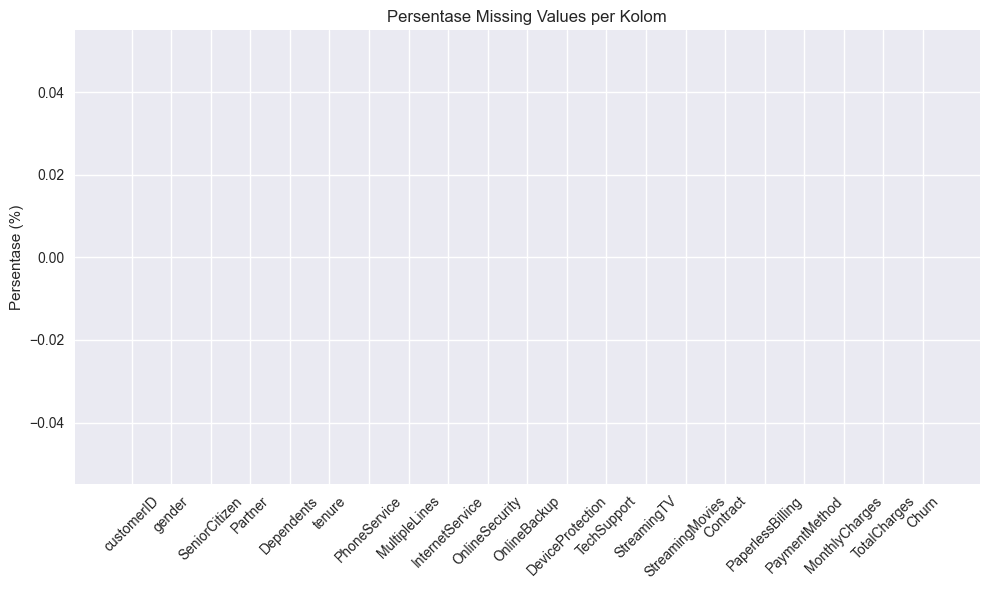


5. DISTRIBUSI VARIABEL TARGET (CHURN):
Jumlah 'No' (Tidak Churn): 5174 (73.46%)
Jumlah 'Yes' (Churn): 1869 (26.54%)


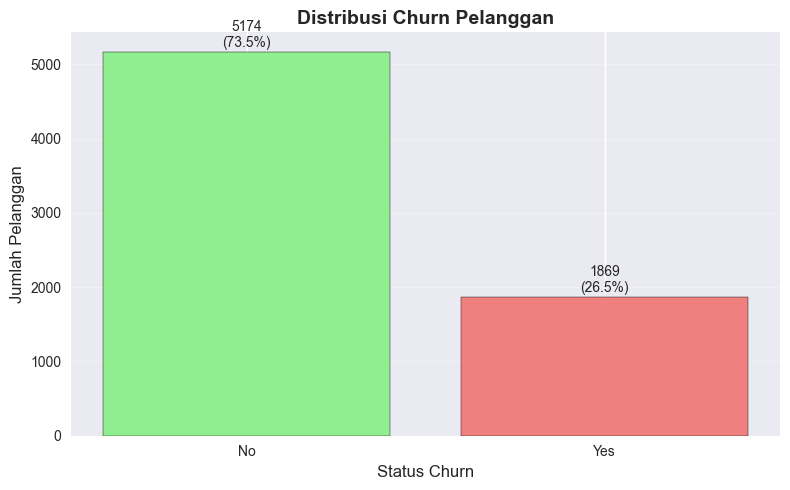


6. ANALISIS KORELASI:


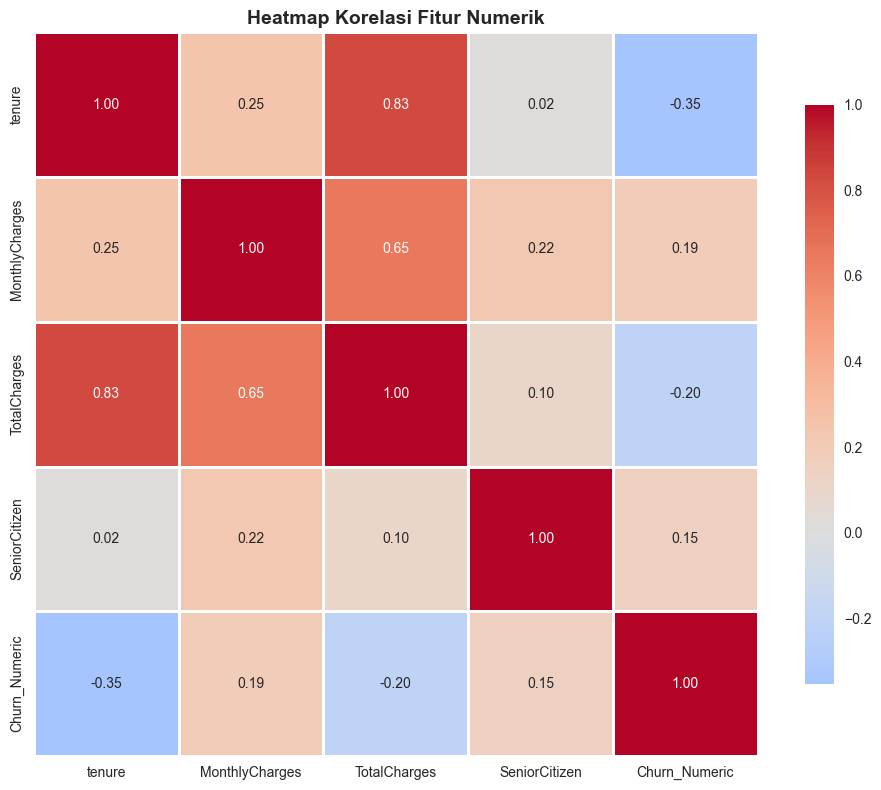


Korelasi dengan Churn:
  tenure: -0.352
  MonthlyCharges: 0.193
  TotalCharges: -0.199
  SeniorCitizen: 0.151

7. ANALISIS FITUR KATEGORIKAL TERHADAP CHURN:


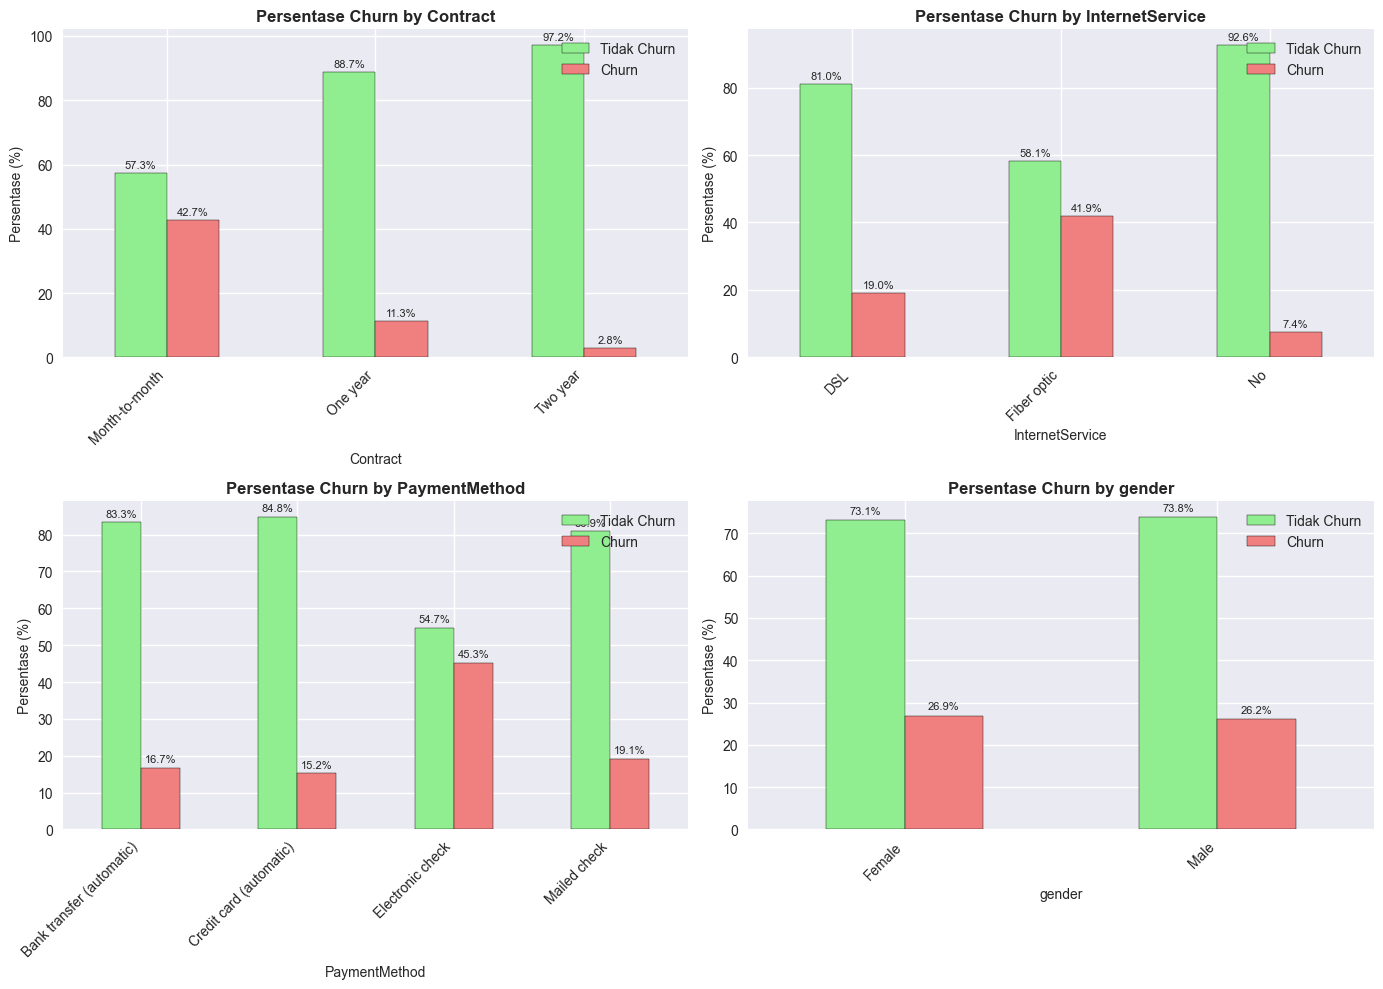


PREPARASI DATA

Missing values di TotalCharges sebelum handling: 11
Missing values di TotalCharges setelah handling: 0

Shape X: (7043, 19)
Shape y: (7043,)

DIRECT MODELING - TANPA PREPROCESSING

Data split:
  Train set: (5634, 19)
  Test set: (1409, 19)

Training model...

--- Logistic Regression ---
  Accuracy:  0.8020
  Precision: 0.6435
  Recall:    0.5695
  F1-Score:  0.6043

--- Random Forest ---
  Accuracy:  0.7921
  Precision: 0.6373
  Recall:    0.5027
  F1-Score:  0.5620

--- Voting Classifier ---
  Accuracy:  0.7956
  Precision: 0.6536
  Recall:    0.4893
  F1-Score:  0.5596


<Figure size 1200x600 with 0 Axes>

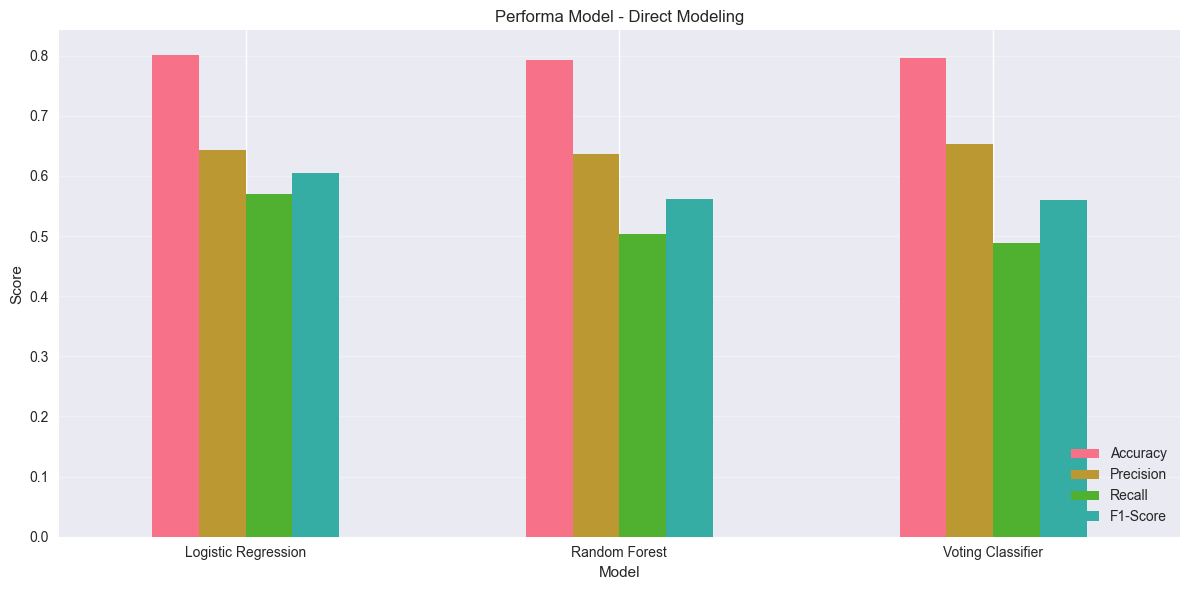


✅ Direct Modeling selesai!

MODELING DENGAN PREPROCESSING

Data setelah preprocessing:
  Train set: (5634, 30)
  Test set: (1409, 30)

Training model dengan data preprocessed...

--- Logistic Regression ---
  Accuracy:  0.8055
  Precision: 0.6582
  Recall:    0.5561
  F1-Score:  0.6029

--- Random Forest ---
  Accuracy:  0.7878
  Precision: 0.6263
  Recall:    0.4973
  F1-Score:  0.5544

--- Voting Classifier ---
  Accuracy:  0.7970
  Precision: 0.6618
  Recall:    0.4813
  F1-Score:  0.5573


<Figure size 1200x600 with 0 Axes>

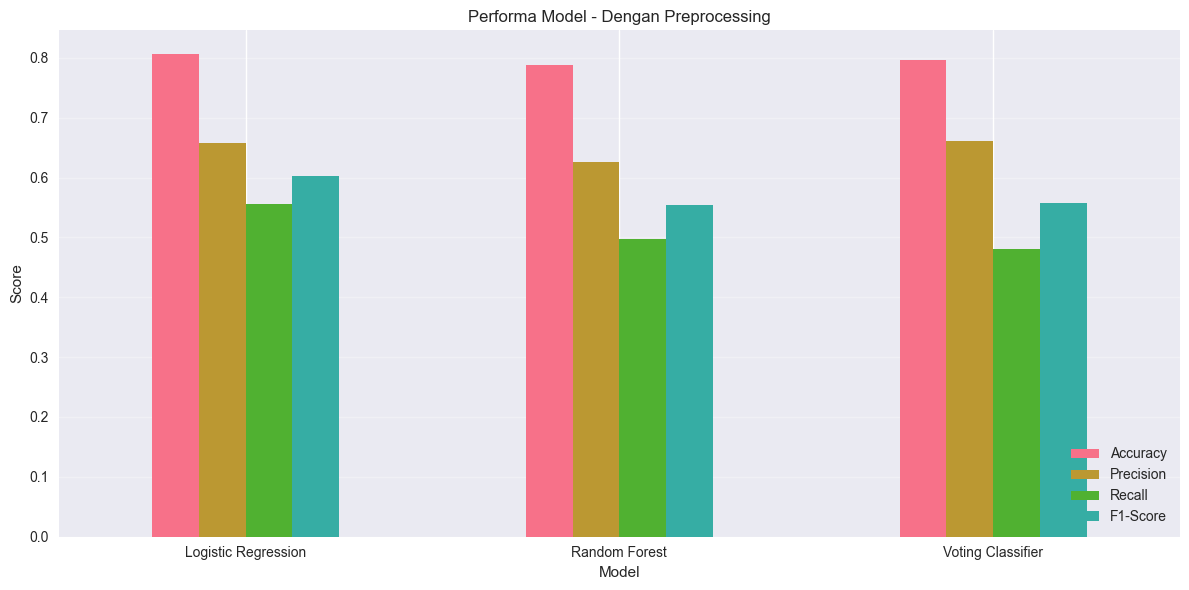

<Figure size 1000x600 with 0 Axes>

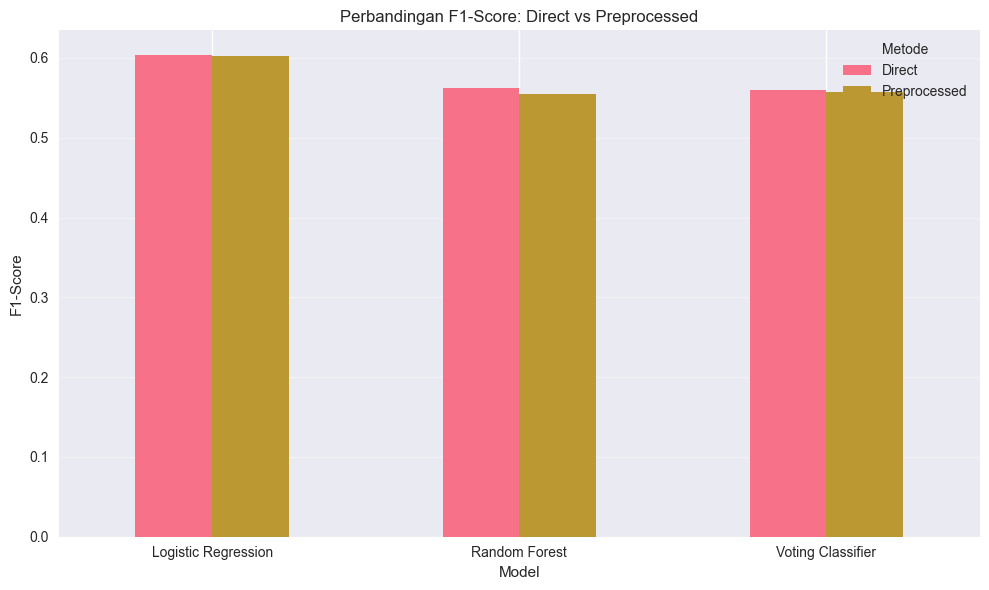


✅ Modeling dengan Preprocessing selesai!

HYPERPARAMETER TUNING

Model terbaik untuk tuning: Logistic Regression

MENYIMPAN MODEL DAN PREPROCESSOR
✅ Preprocessor disimpan sebagai: preprocessor.pkl

⚠️  Variabel 'best_model' tidak ditemukan. Membuat model terbaik...
📊 Model terbaik berdasarkan F1-Score: Logistic Regression
✅ Model Logistic Regression telah dilatih ulang
✅ Model terbaik disimpan sebagai: model.pkl
✅ Model berhasil di-load. F1-Score: 0.6029

✅ Analisis selesai! Model siap untuk deployment.


In [3]:
# -*- coding: utf-8 -*-
"""
ANALISIS DATA SCIENCE - PREDIKSI CHURN PELANGGAN TELCO
UAS Bengkel Koding Data Science
"""

# ============================================================================
# CELL 1: IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Utils
import joblib
from datetime import datetime

print("✅ Semua library berhasil diimport")

# ============================================================================
# CELL 2: LOAD DATASET
# ============================================================================

print("Memuat dataset...")
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
print(f"✅ Dataset berhasil dimuat: {df.shape[0]} baris, {df.shape[1]} kolom")

# ============================================================================
# CELL 3: EDA - EKSPLORASI AWAL
# ============================================================================

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# 1. Tampilkan 5 baris pertama
print("\n1. 5 BARIS PERTAMA DATASET:")
print(df.head())

# 2. Info dataset
print("\n2. INFORMASI DATASET:")
df.info()

# 3. Statistik deskriptif
print("\n3. STATISTIK DESKRIPTIF:")
print(df.describe())

# 4. Cek missing values
print("\n4. ANALISIS MISSING VALUES:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Jumlah_Missing': missing_data,
    'Persentase': missing_percentage
})
print(missing_df[missing_df['Jumlah_Missing'] > 0])

# Visualisasi missing values
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_df.index, missing_df['Persentase'])
plt.title('Persentase Missing Values per Kolom')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# CELL 4: EDA - DISTRIBUSI TARGET
# ============================================================================

print("\n5. DISTRIBUSI VARIABEL TARGET (CHURN):")

# Hitung distribusi
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print(f"Jumlah 'No' (Tidak Churn): {churn_counts['No']} ({churn_percentage['No']:.2f}%)")
print(f"Jumlah 'Yes' (Churn): {churn_counts['Yes']} ({churn_percentage['Yes']:.2f}%)")

# Visualisasi
plt.figure(figsize=(8, 5))
colors = ['lightgreen', 'lightcoral']
bars = plt.bar(churn_counts.index, churn_counts.values, color=colors, edgecolor='black')

plt.title('Distribusi Churn Pelanggan', fontsize=14, fontweight='bold')
plt.xlabel('Status Churn', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{height}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# CELL 5: EDA - ANALISIS KORELASI
# ============================================================================

print("\n6. ANALISIS KORELASI:")

# Konversi TotalCharges ke numeric (handle empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Pilih kolom numerik untuk korelasi
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
df_numeric = df[numeric_cols].copy()

# Konversi target ke numerik untuk korelasi
df_numeric['Churn_Numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Hitung korelasi
correlation_matrix = df_numeric.corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Korelasi dengan target
print("\nKorelasi dengan Churn:")
for col in correlation_matrix.columns:
    if col != 'Churn_Numeric':
        print(f"  {col}: {correlation_matrix.loc[col, 'Churn_Numeric']:.3f}")

# ============================================================================
# CELL 6: EDA - ANALISIS FITUR KATEGORIKAL
# ============================================================================

print("\n7. ANALISIS FITUR KATEGORIKAL TERHADAP CHURN:")

# Pilih beberapa fitur kategorikal penting
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'gender']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    # Hitung persentase churn per kategori
    churn_by_feature = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack() * 100
    
    ax = axes[idx]
    churn_by_feature.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'], edgecolor='black')
    
    ax.set_title(f'Persentase Churn by {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Persentase (%)', fontsize=10)
    ax.legend(['Tidak Churn', 'Churn'], loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Tambahkan label persentase
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('images/categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# CELL 7: PREPARASI DATA UNTUK MODELING
# ============================================================================

print("\n" + "="*60)
print("PREPARASI DATA")
print("="*60)

# Simpan data asli untuk referensi
df_original = df.copy()

# Handle missing values di TotalCharges
print(f"\nMissing values di TotalCharges sebelum handling: {df['TotalCharges'].isnull().sum()}")
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f"Missing values di TotalCharges setelah handling: {df['TotalCharges'].isnull().sum()}")

# Encode target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Pisahkan features dan target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# ============================================================================
# CELL 8: DIRECT MODELING
# ============================================================================

print("\n" + "="*60)
print("DIRECT MODELING - TANPA PREPROCESSING")
print("="*60)

# Identifikasi tipe kolom
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encoding sederhana untuk kategorikal (Label Encoding)
X_direct = X.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_direct[col] = le.fit_transform(X_direct[col].astype(str))
    label_encoders[col] = le

# Split data
X_train_direct, X_test_direct, y_train_direct, y_test_direct = train_test_split(
    X_direct, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"  Train set: {X_train_direct.shape}")
print(f"  Test set: {X_test_direct.shape}")

# Define models
models_direct = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(random_state=42, max_iter=1000)),
            ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        voting='soft'
    )
}

# Train and evaluate
results_direct = {}

print("\nTraining model...")
for name, model in models_direct.items():
    print(f"\n--- {name} ---")
    
    # Training
    model.fit(X_train_direct, y_train_direct)
    
    # Prediction
    y_pred = model.predict(X_test_direct)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_direct, y_pred)
    precision = precision_score(y_test_direct, y_pred)
    recall = recall_score(y_test_direct, y_pred)
    f1 = f1_score(y_test_direct, y_pred)
    
    # Store results
    results_direct[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Visualisasi hasil Direct Modeling
results_df_direct = pd.DataFrame(results_direct).T

plt.figure(figsize=(12, 6))
results_df_direct.plot(kind='bar', figsize=(12, 6))
plt.title('Performa Model - Direct Modeling')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/direct_modeling_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Direct Modeling selesai!")

# ============================================================================
# CELL 9: MODELING DENGAN PREPROCESSING
# ============================================================================

print("\n" + "="*60)
print("MODELING DENGAN PREPROCESSING")
print("="*60)

# Buat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Transform data
X_preprocessed = preprocessor.fit_transform(X)

# Split data
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData setelah preprocessing:")
print(f"  Train set: {X_train_pre.shape}")
print(f"  Test set: {X_test_pre.shape}")

# Gunakan model yang sama
models_preprocessed = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(random_state=42, max_iter=1000)),
            ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        voting='soft'
    )
}

# Train and evaluate
results_preprocessed = {}

print("\nTraining model dengan data preprocessed...")
for name, model in models_preprocessed.items():
    print(f"\n--- {name} ---")
    
    # Training
    model.fit(X_train_pre, y_train_pre)
    
    # Prediction
    y_pred = model.predict(X_test_pre)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_pre, y_pred)
    precision = precision_score(y_test_pre, y_pred)
    recall = recall_score(y_test_pre, y_pred)
    f1 = f1_score(y_test_pre, y_pred)
    
    # Store results
    results_preprocessed[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Visualisasi hasil
results_df_preprocessed = pd.DataFrame(results_preprocessed).T

plt.figure(figsize=(12, 6))
results_df_preprocessed.plot(kind='bar', figsize=(12, 6))
plt.title('Performa Model - Dengan Preprocessing')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/preprocessed_modeling_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Perbandingan Direct vs Preprocessed
comparison_df = pd.DataFrame({
    'Direct': results_df_direct['F1-Score'],
    'Preprocessed': results_df_preprocessed['F1-Score']
})

plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan F1-Score: Direct vs Preprocessed')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=0)
plt.legend(title='Metode')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/comparison_f1_score.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Modeling dengan Preprocessing selesai!")

# ============================================================================
# CELL 10: HYPERPARAMETER TUNING
# ============================================================================

print("\n" + "="*60)
print("HYPERPARAMETER TUNING")
print("="*60)

# Pilih model terbaik berdasarkan F1-Score
best_model_name = results_df_preprocessed['F1-Score'].idxmax()
print(f"\nModel terbaik untuk tuning: {best_model_name}")

if best_model_name == 'Random Forest':
    # Tuning untuk Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    base_model = RandomForestClassifier(random_state=42)
    
    # Perform Grid Search
    print(f"\nMelakukan Grid Search untuk Random Forest...")
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_pre, y_train_pre)
    
    print(f"✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Best F1-Score (CV): {grid_search.best_score_:.4f}")
    
    # Evaluasi model terbaik
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test_pre)
    
    # Calculate metrics
    accuracy_tuned = accuracy_score(y_test_pre, y_pred_tuned)
    precision_tuned = precision_score(y_test_pre, y_pred_tuned)
    recall_tuned = recall_score(y_test_pre, y_pred_tuned)
    f1_tuned = f1_score(y_test_pre, y_pred_tuned)
    
    print(f"\n📊 Hasil evaluasi model terbaik di test set:")
    print(f"  Accuracy:  {accuracy_tuned:.4f}")
    print(f"  Precision: {precision_tuned:.4f}")
    print(f"  Recall:    {recall_tuned:.4f}")
    print(f"  F1-Score:  {f1_tuned:.4f}")

# ============================================================================
# CELL 11: SIMPAN MODEL DAN PREPROCESSOR
# ============================================================================

print("\n" + "="*60)
print("MENYIMPAN MODEL DAN PREPROCESSOR")
print("="*60)

# Simpan preprocessor
preprocessor_path = 'preprocessor.pkl'
joblib.dump(preprocessor, preprocessor_path)
print(f"✅ Preprocessor disimpan sebagai: {preprocessor_path}")

# SIMPAN MODEL TERBAIK - PERBAIKAN DI SINI
if 'best_model' not in locals():
    print("\n⚠️  Variabel 'best_model' tidak ditemukan. Membuat model terbaik...")
    
    # Pilih model terbaik berdasarkan F1-Score dari hasil preprocessing
    best_model_name = results_df_preprocessed['F1-Score'].idxmax()
    print(f"📊 Model terbaik berdasarkan F1-Score: {best_model_name}")
    
    # Latih ulang model terbaik
    if best_model_name == 'Logistic Regression':
        best_model = LogisticRegression(random_state=42, max_iter=1000)
    elif best_model_name == 'Random Forest':
        best_model = RandomForestClassifier(random_state=42, n_estimators=200)
    elif best_model_name == 'Voting Classifier':
        best_model = VotingClassifier(
            estimators=[
                ('lr', LogisticRegression(random_state=42, max_iter=1000)),
                ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),
                ('svc', SVC(probability=True, random_state=42))
            ],
            voting='soft'
        )
    
    # Train the best model
    best_model.fit(X_train_pre, y_train_pre)
    print(f"✅ Model {best_model_name} telah dilatih ulang")

# Simpan model terbaik
model_path = 'model.pkl'
joblib.dump(best_model, model_path)
print(f"✅ Model terbaik disimpan sebagai: {model_path}")

# Evaluasi model yang disimpan
loaded_model = joblib.load(model_path)
y_pred_loaded = loaded_model.predict(X_test_pre)
f1_loaded = f1_score(y_test_pre, y_pred_loaded)
print(f"✅ Model berhasil di-load. F1-Score: {f1_loaded:.4f}")

print("\n✅ Analisis selesai! Model siap untuk deployment.")